# Titanic dataset

## VARIABLE DESCRIPTIONS
* Pclass = Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* survived = Survival (0 = No; 1 = Yes)
* Sibsp = Number of Siblings/Spouses Aboard
* Parch = Number of Parents/Children Aboard
* Ticket = Ticket Number
* Fare = Passenger Fare (British pound)
* Embarked = Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

## Train data_set

In [2]:
df = pd.read_csv(r'D:\ML_WORK\Kaggle\Titanic\train_preprocessed.csv')

In [3]:
df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## input and output feature

In [4]:
X = df.loc[:,['Sex', 'Age', 'SibSp','Parch','Fare','Embarked']]

y = df.loc[:,'Survived']

## Outlier Detection

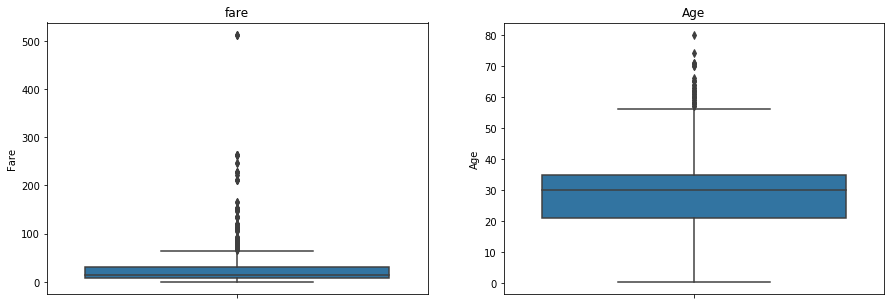

In [5]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(data=X, y='Fare')
plt.title('fare')

plt.subplot(1,2,2)
sns.boxplot(data=X, y='Age')
plt.title('Age')

plt.show()

## outlier removal

In [6]:
X.loc[(X["Age"] >70),'Age'] = X.Age.median()

X.loc[(X["Fare"] >400),'Fare'] = X.Fare.median()

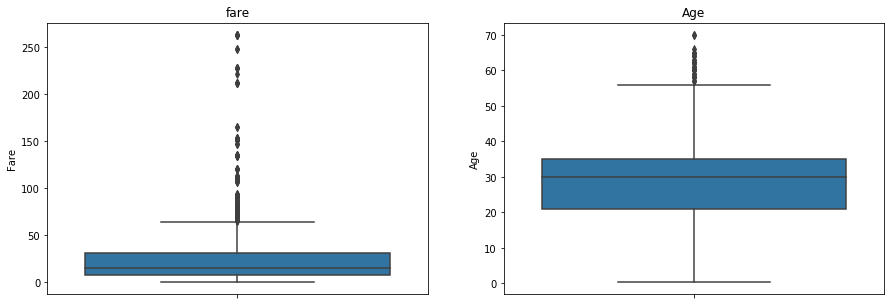

In [7]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(data=X, y='Fare')
plt.title('fare')

plt.subplot(1,2,2)
sns.boxplot(data=X, y='Age')
plt.title('Age')

plt.show()

# onehoeencoding

In [8]:
X = pd.get_dummies(data=X,columns=['Sex','Embarked'])

## Standardisation

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
standard_scale = StandardScaler()

scaled_X = standard_scale .fit_transform(X) 

## train and test split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(scaled_X, y , test_size = 1/4, random_state=100)

## Logistic regression  Model

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
clf = LogisticRegression(penalty='l2', random_state=0)

clf.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
yhat_train = clf.predict(x_train)

yhat_test = clf.predict(x_test)

## Model accuracy

In [16]:
from sklearn.metrics import classification_report,confusion_matrix

## Model accuracy on train dataset

In [17]:
print(classification_report(y_train,yhat_train))

             precision    recall  f1-score   support

          0       0.82      0.87      0.84       422
          1       0.75      0.67      0.71       246

avg / total       0.79      0.79      0.79       668



## Model accuracy on test dataset

In [18]:
print(classification_report(y_test,yhat_test))

             precision    recall  f1-score   support

          0       0.77      0.87      0.81       127
          1       0.79      0.66      0.72        96

avg / total       0.78      0.78      0.77       223



## Confusion matrix

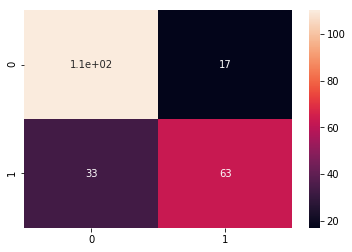

[[110  17]
 [ 33  63]]


In [19]:
sns.heatmap(confusion_matrix(y_test,yhat_test),annot=True)
plt.show()

print(confusion_matrix(y_test,yhat_test))

## feartures weight

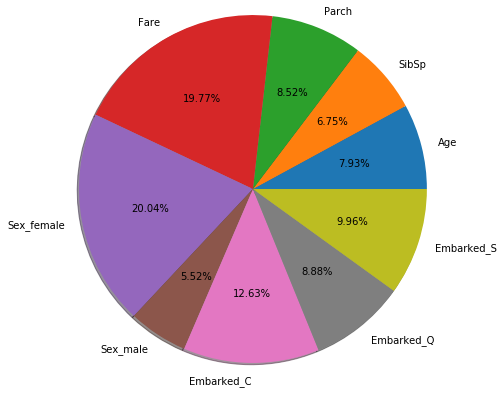

In [20]:
plt.axis('equal')
plt.pie(np.exp(clf.coef_).T,labels=X.columns,radius=2,autopct='%0.2f%%',shadow=True)
plt.show()

## Test dataset

In [21]:
df_test = pd.read_csv(r'D:\ML_WORK\Kaggle\Titanic\test_preprocessed.csv')

## Outlier detection

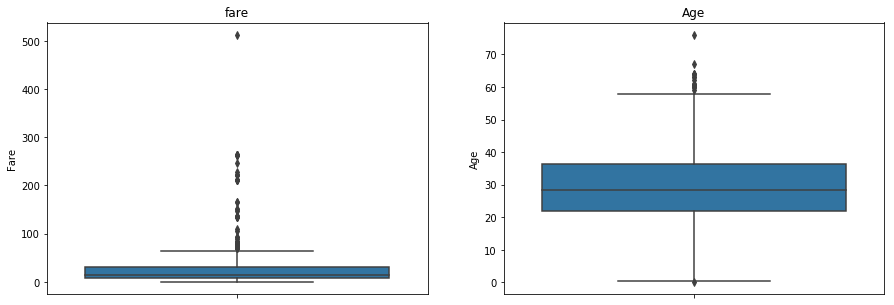

In [22]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(data=df_test, y='Fare')
plt.title('fare')

plt.subplot(1,2,2)
sns.boxplot(data=df_test, y='Age')
plt.title('Age')

plt.show()

## Outlier removal

In [23]:
df_test.loc[(df_test["Age"] >70),'Age'] = df_test.Age.median()

df_test.loc[(df_test["Fare"] >400),'Fare'] = df_test.Fare.median()

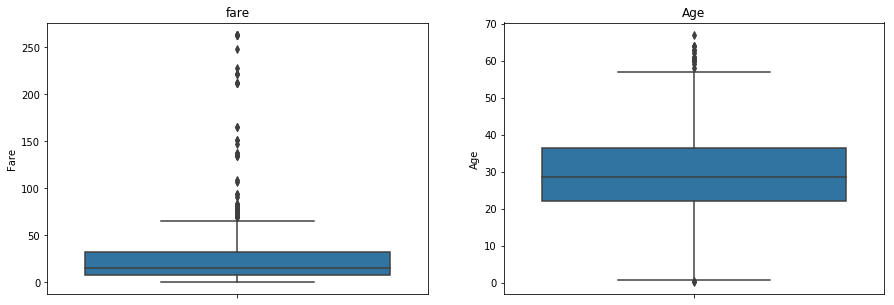

In [24]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(data=df_test, y='Fare')
plt.title('fare')

plt.subplot(1,2,2)
sns.boxplot(data=df_test, y='Age')
plt.title('Age')

plt.show()

# input features test

In [25]:
X_test = df_test.loc[:,['Sex', 'Age', 'SibSp','Parch','Fare','Embarked']]


## Onehotencoding

In [26]:
X_test = pd.get_dummies(data=X_test,columns=['Sex','Embarked'])

## Prediction

In [27]:
test_yhat = clf.predict(X_test)

In [29]:
submission = pd.DataFrame(df_test.iloc[:,0])

submission['Survived'] = test_yhat

